In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dfx=pd.read_csv("E:/machine learning course/training//Linear_X_Train.csv")
x=dfx.values
dfy=pd.read_csv("E:/machine learning course/training/Linear_Y_Train.csv")
y=dfy.values

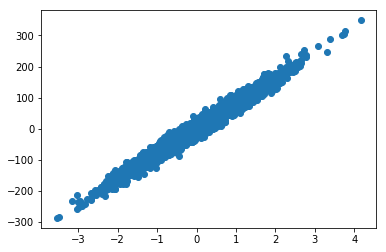

In [10]:
X=(x-x.mean())/x.std()
Y=y
plt.scatter(X,Y)
plt.show()

In [11]:
def hypothesis(x,theta):
    return theta[0]+(theta[1]*x)

In [12]:
def error(X,Y,theta):
    m=x.shape[0]
    err=0
    for i in range (m):
        hx=hypothesis(X[i],theta)
        err+=((hx-Y[i])**2)
    return err

In [13]:
def gradient(X,Y,theta):
    grad=np.zeros((2,))
    m=X.shape[0]
    for i in range (m):
        hx=hypothesis(X[i],theta)
        grad[0]+=(hx-Y[i])
        grad[1]+=((hx-Y[i])*X[i])
    return grad

In [ ]:
def gradient_decent(X,Y,learning_rate=0.0001):
    error_list=[]
    itr=0
    max_itr=100
    theta=np.zeros((2,))
    while(itr<=max_itr):
        grad=gradient(X,Y,theta)
        theta[0]=theta[0]-(learning_rate*grad[0])
        theta[1]=theta[1]-(learning_rate*grad[1])
        e=error(X,Y,theta)
        error_list.append(e)
        itr+=1
    return theta,error_list

In [ ]:
final_theta,error_list=gradient_decent(X,Y)
print(final_theta)

In [ ]:
dfxtest=pd.read_csv("E:/machine learning course/testing/Linear_X_Test.csv")
xtest=dfxtest.values

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(xtest,hypothesis(xtest,final_theta),color='orange',label='TESTING SAMPLE')
plt.scatter(X,Y,label='TRAINING DATA')
plt.legend()
plt.show()

In [ ]:
final_output=hypothesis(xtest,final_theta)

In [ ]:
print(final_output)

In [ ]:
print(type(final_output))

In [ ]:
final_output.tofile('output.csv',sep='\n',format='%.6f')

In [ ]:
np.savetxt('submission1.csv',final_output,fmt='%0.6f')